
# Ordinary Kriging Example

First we will create a 2D dataset together with the associated x, y grids.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

Create the ordinary kriging object. Required inputs are the X-coordinates of
the data points, the Y-coordinates of the data points, and the Z-values of the
data points. If no variogram model is specified, defaults to a linear variogram
model. If no variogram model parameters are specified, then the code automatically
calculates the parameters by fitting the variogram model to the binned
experimental semivariogram. The verbose kwarg controls code talk-back, and
the enable_plotting kwarg controls the display of the semivariogram.



In [3]:
OK = OrdinaryKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
)

Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
grid of points, on a masked rectangular grid of points, or with arbitrary points.
(See OrdinaryKriging.__doc__ for more information.)



In [4]:
z, ss = OK.execute("grid", gridx, gridy)

Writes the kriged grid to an ASCII grid file and plot it.



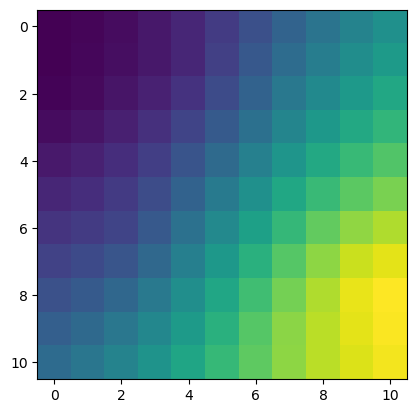

In [5]:
kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
plt.imshow(z)
plt.show()